# Dataset other_train.csv
#### Anton Rusňák, František Gič

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
%matplotlib inline

data = pd.read_csv("data/other_train.csv",sep=",")

### Opis dát:

Dataset obsahuje informácie o osobách, ich adresu bydliska.<br>
<br>Oproti prvému datasetu obsahuje navyše medicínske dáta napríklad ako úrovne glukózy alebo kyslíku v krvi.
<br>Taktiež dáta súkromného charakteru ako vzťah, úroveň vzdelania, tehotenstvo alebo pracovného charakteru ako počet odpracovaných hodín za týždeň alebo zárobok.
<br>Spoločné atribúty majú tieto datasety iba atribúty name a address , na základe týchto atribútov ich budeme môcť mergovať.
<br><br>
Obsahuje 3982 záznamov (riadkov okrem hlavičky) a 22 atribútov.

In [3]:
data.columns

Index(['Unnamed: 0', 'name', 'address', 'kurtosis_oxygen', 'pregnant',
       'education-num', 'relationship', 'skewness_glucose', 'mean_glucose',
       'std_oxygen', 'capital-gain', 'skewness_oxygen', 'kurtosis_glucose',
       'personal_info', 'education', 'fnlwgt', 'class', 'std_glucose',
       'income', 'mean_oxygen', 'hours-per-week', 'capital-loss'],
      dtype='object')

In [4]:
print('Počet stĺpcov : ',data.shape[1] , '\nPočet riadkov: ', data.shape[0])

Počet stĺpcov :  22 
Počet riadkov:  3983


In [5]:
data.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,0,Alex Chinzi,"590 Samantha Bridge Apt. 572\r\nNorth Allison,...",8.286599,f,16.0,Husband,0.234418,107.484375,15.072284,...,0.362969,Prof-specialty|United-States\r\r\nMarried-civ-...,Doctorate,320102.0,0.0,44.487706,>50K,2.448161,50.0,0.0
1,1,Scott Bass,"5384 Hurst Groves Apt. 092\r\nFreemanview, SD ...",6.455860,f,13.0,Own-child,0.151130,140.203125,21.925411,...,-0.170101,Prof-specialty|United-States\r\r\nNever-marrie...,Bachelors,148300.0,0.0,44.586531,<=50K,4.445652,15.0,0.0
2,2,Chuck Lao,USS Scott\r\nFPO AE 78885,11.513491,f,9.0,Unmarried,-0.024384,124.054688,11.822427,...,-0.026966,Other-service|Mexico\r\r\nSeparated -- Private...,HS-grad,190885.0,0.0,45.904165,<=50K,1.890468,40.0,0.0
3,3,Floyd Squires,"122 Ryan Ranch Suite 621\r\nPort Douglas, NM 0...",7.641796,f,13.0,Not-in-family,-0.564287,115.046875,22.965651,...,0.269421,Prof-specialty|Canada\r\r\nNever-married -- Pr...,Bachelors,191385.0,0.0,58.140302,<=50K,3.639632,40.0,0.0
4,4,Kenneth Cadet,"30930 Ryan Groves\r\nKatelynside, MS 75220",8.826058,f,9.0,Husband,0.495896,93.335938,13.777158,...,0.537549,Sales|United-States\r\r\nMarried-civ-spouse --...,HS-grad,226875.0,0.0,45.605865,<=50K,2.510870,40.0,0.0


Opäť, ako aj pri prvom dataset je z výpisu DataFrame.head() jasné, že prvý, nepomenovaný stĺpec je v datasete použitý ako index, preto ho môžme odstrániť.

In [6]:
data = data.drop(data.columns[0],axis=1)

## Opis atribútov:
Atribúty datasetu sú stringy aj floaty.

In [7]:
data.dtypes

name                 object
address              object
kurtosis_oxygen     float64
pregnant             object
education-num       float64
relationship         object
skewness_glucose    float64
mean_glucose        float64
std_oxygen          float64
capital-gain        float64
skewness_oxygen     float64
kurtosis_glucose    float64
personal_info        object
education            object
fnlwgt              float64
class               float64
std_glucose         float64
income               object
mean_oxygen         float64
hours-per-week      float64
capital-loss        float64
dtype: object

Dataset taktiež obsahuje celkom veľa chýbajúcich hodnôt.<br>
Z výpisu je možné vidieť, že nie všetky atribúty obsahujú hodnoty.

In [8]:
print("Dataset obsahuje celkovo %d chýbajúcich hodnôt"%int(data.shape[0] - data.dropna().shape[0]))

Dataset obsahuje celkovo 76 chýbajúcich hodnôt


In [9]:
data.isnull().sum()

name                 0
address              0
kurtosis_oxygen      5
pregnant            12
education-num       18
relationship        13
skewness_glucose    23
mean_glucose        10
std_oxygen          14
capital-gain        16
skewness_oxygen     13
kurtosis_glucose    18
personal_info       12
education           12
fnlwgt              13
class               19
std_glucose         12
income              14
mean_oxygen         16
hours-per-week      13
capital-loss        20
dtype: int64

## Deskriptívne štatistiky 

In [10]:
data.describe()

,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3978.000000,3965.000000,3960.000000,3973.000000,3969.000000,3967.000000,3970.000000,3965.000000,3970.000000,3964.000000,3971.000000,3967.000000,3970.000000,3963.000000
mean,7.414473,10.084489,4.242530,101.248940,31.148558,1042.988908,91.370712,0.950507,192967.197985,0.255298,74.479764,18.470601,40.568766,80.275549
std,4.811907,2.588918,9.706012,33.601519,22.263993,7006.726961,108.475749,1.611069,103285.567216,0.436083,1448.165852,34.808695,12.601133,388.336046
min,-2.597872,1.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,19214.000000,0.000000,-8305.388133,0.213211,1.000000,0.000000
25%,3.630716,9.000000,-0.120081,87.742188,15.024700,0.000000,12.858504,0.072144,120960.000000,0.000000,39.502222,2.061873,40.000000,0.000000
50%,7.784802,10.000000,0.374657,110.664062,20.547873,0.000000,68.623477,0.310372,182045.000000,0.000000,45.928079,3.223244,40.000000,0.000000
75%,10.278883,12.000000,2.091543,124.132812,43.253607,0.000000,127.236918,0.775684,241631.000000,1.000000,51.048246,12.610786,45.000000,0.000000
max,34.539844,16.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,889965.000000,1.000000,6649.471314,217.371238,99.000000,3770.000000


## Opis atribútov a identifikácia chýb:

Atribút **kurtosis_oxygen**
 - je to spojitý číselný atribút nad ktorým môžme vykonávať deskriptívnu štatistiku
 - je to koeficient špicatosti distribúcie dát o hodnote kyslíku v krvi daného pacienta
 - atribút je typu float
 - obsahuje chýbajúce hodnoty, vhodnou korekciou je nahradenie prázdnych hodnôt mediánom
 

In [11]:
print("Počet chýbajúcich hodnôt v atribúte kurtosis_oxygen: %d"%data.kurtosis_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte kurtosis_oxygen: 5


In [12]:
data.kurtosis_oxygen.describe()

count    3978.000000
mean        7.414473
std         4.811907
min        -2.597872
25%         3.630716
50%         7.784802
75%        10.278883
max        34.539844
Name: kurtosis_oxygen, dtype: float64

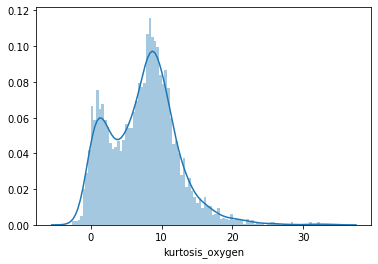

In [13]:
sns.distplot(data.kurtosis_oxygen.dropna(),bins=100)

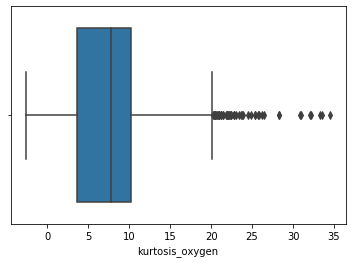

In [14]:
sns.boxplot(data.kurtosis_oxygen.dropna())

Na boxplote je možno vidieť, že kurtosis_oxygen obsahuje veľa outlierov.

In [15]:
def iqr(attribute): 
    return data[attribute].quantile(0.75) - data[attribute].quantile(0.25) 

def outliers(attribute):
    iqrange = iqr(attribute)
    return data[(data[attribute] > (data[attribute].quantile(0.75) + iqrange*1.5)) | (data[attribute] < (data[attribute].quantile(0.25) - 1.5*iqrange))]


In [16]:
outliers_ko = outliers("kurtosis_oxygen")
print("Počet outlierov v atribúte kurtosis_oxygen je %d"%len(outliers_ko))

Počet outlierov v atribúte kurtosis_oxygen je 51


Atribút **pregnant**
 - je to kategorický binárny atribút vyjadrujúci tehotenstvo pacienta
 - jeho typ je string nadobúdajúci viacero foriem hodnôt, preto je treba tieto hodnoty upraviť a zjednotiť
 - obsahuje taktiež prázdne hodnoty

In [17]:
data['pregnant'].value_counts()

f        3517
FALSE     199
F         192
t          57
TRUE        4
T           2
Name: pregnant, dtype: int64

In [18]:
def sanitize_boolean(boolean):
    try:
        if boolean.strip() in ['f','F','FALSE','false','False']:
            return False
        elif boolean.strip() in ['t','T','TRUE','true','True']:
            return True
    except AttributeError:
        return None
    
data.pregnant = data.pregnant.apply(sanitize_boolean)

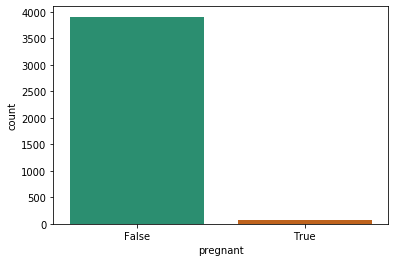

In [19]:
sns.countplot(data=data,x="pregnant",palette=("Dark2"))

Zo stĺpcového diagramu teda vidíme, že vačšina pacientov nie je tehotná.
<br>Pri čistení hodnôt sme však našli aj prázdne hodnoty, čiastočne by sme navrhovali napríklad nastavenie hodnoty False tým riadkom ktoré majú hodnotu atribútu **relationship** "Husband" alebo, ktoré po spojení tabuliek budú mať atribút **sex** nastavený na hodnotu "Male" 

In [20]:
print("Počet chýbajúcich hodnôt v atribúte pregnant: %d"%data.pregnant.isnull().sum())

Počet chýbajúcich hodnôt v atribúte pregnant: 12


Atribút **education-num**
- je spojitý číselný atribút na ktorom môžme vykonávať deskriptívne štatistiky
- pravdepodobne číslo vyjadruje sčítanosť pacienta
- nadobúda celočíselné hodnoty
- taktiež obsahuje prázdne dáta, možnosť nahradenia mediánom, alebo vypočítať číslo ako závislosť s atribútom education 

In [21]:
data['education-num'].describe()

count    3965.000000
mean       10.084489
std         2.588918
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education-num, dtype: float64

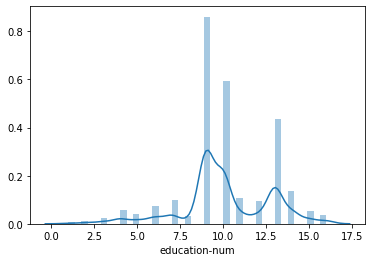

In [22]:
sns.distplot(data['education-num'].dropna())

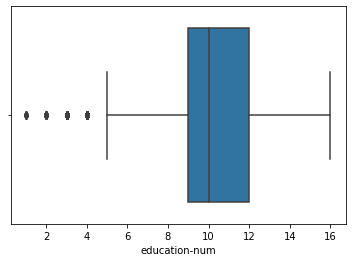

In [23]:
sns.boxplot(data['education-num'].dropna())

In [24]:
print("Počet chýbajúcich hodnôt v atribúte education-num: %d"%data['education-num'].isnull().sum())


Počet chýbajúcich hodnôt v atribúte education-num: 18


Atribút **relationship**
 - je to kategorický atribút vyjadrujúci vzťah pacienta v ktorom
 - dáta sú typu string, a sú pomerne čisté, nie je potreba ich s výnimkou odstránenia whitespace upravovať
 - obsahuje zopár chýbajúcich hodnoty, ale číslo je zanedbateľné

In [25]:
data.relationship.describe()

count         3970
unique           6
top        Husband
freq          1649
Name: relationship, dtype: object

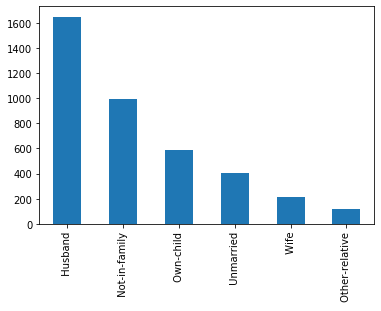

In [26]:
data.relationship.value_counts().plot.bar()

Vidíme ze v našom datasete prevládaju pacienti, muži, ktorí sú zároveň manželia.

In [27]:
print("Počet chýbajúcich hodnôt v atribúte relationship: %d"%data.relationship.isnull().sum())

Počet chýbajúcich hodnôt v atribúte relationship: 13


Atribút **skewness_glucose**
- atribút vyjadruje koeficient asymetrie rozdelenia meraných hodnôt glukózy v krvi pacienta
- spojitý číselný atribút, vykonávame deskriptívne štatistiky
- nie všetky hodnoty sú vyplnené


In [28]:
data.skewness_glucose.describe()

count    3960.000000
mean        4.242530
std         9.706012
min        -1.755332
25%        -0.120081
50%         0.374657
75%         2.091543
max        68.101622
Name: skewness_glucose, dtype: float64

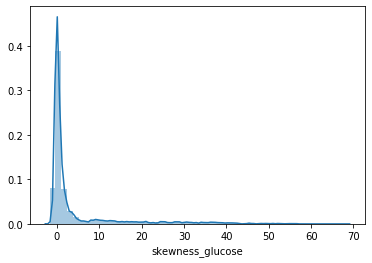

In [29]:
sns.distplot(data.skewness_glucose.dropna())

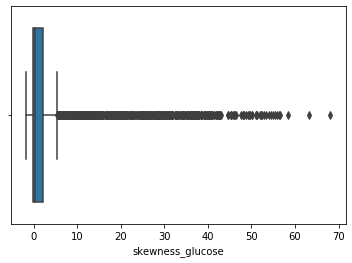

In [30]:
sns.boxplot(data.skewness_glucose.dropna())

Z grafov i štatistík môžme vidieť, že medzikvartilové rozpätie je pomerne úzke, s mediánom okolo 0, čiže väčšina pacientov má skoro symetrické rozdelenie hodnôt po meraní hladiny glukózy v krvi.
<br>Avšak,v dátach máme veľký počet outlierov. 

In [31]:
outliers_sg = outliers("skewness_glucose")
print("Počet outlierov v atribúte skewness_glucose je %d"%len(outliers_sg))

Počet outlierov v atribúte skewness_glucose je 685


In [32]:
print("Počet chýbajúcich hodnôt v atribúte skewness_glucose: %d"%data.skewness_glucose.isnull().sum())

Počet chýbajúcich hodnôt v atribúte skewness_glucose: 23


Atribút **mean_glucose**
- opäť číselný spojitý atribút, typu float, vykonáme deskriptívne štatistiky
- vyjadruje medián, strednú hodnotu v meraniach hodnoty glukózy v krvi pacienta
- obsahuje prázdne hodnoty

In [33]:
data.mean_glucose.describe()

count    3973.000000
mean      101.248940
std        33.601519
min         6.187500
25%        87.742188
50%       110.664062
75%       124.132812
max       189.734375
Name: mean_glucose, dtype: float64

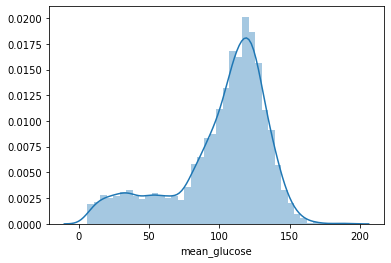

In [34]:
sns.distplot(data.mean_glucose.dropna())

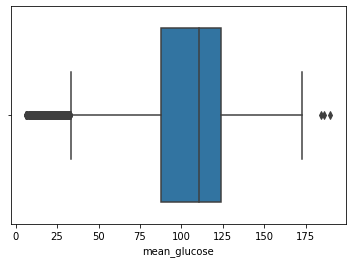

In [35]:
sns.boxplot(data.mean_glucose.dropna())

Z boxplotu vidíme, že v atribúte máme výrazných outlierov.

In [36]:
outliers_mg = outliers("mean_glucose")
print("Počet outlierov v atribúte mean_glucose je %d"%len(outliers_mg))

Počet outlierov v atribúte mean_glucose je 275


In [37]:
print("Počet chýbajúcich hodnôt v atribúte mean_glucose: %d"%data.mean_glucose.isnull().sum())

Počet chýbajúcich hodnôt v atribúte mean_glucose: 10


Atribút **std_oxygen**
- je spojitý číselný atribút
- smerodajná odchýlka od normalneho rozdelenia hodnot nameraného kyslíku v krvi
- obsahuje aj chýbajúce hodnoty 

In [38]:
data.std_oxygen.describe()

count    3969.000000
mean       31.148558
std        22.263993
min         7.370432
25%        15.024700
50%        20.547873
75%        43.253607
max       110.642211
Name: std_oxygen, dtype: float64

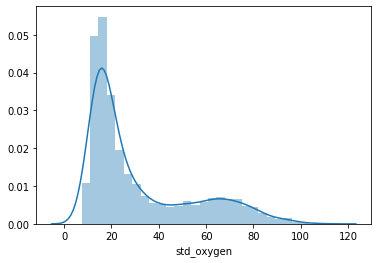

In [39]:
sns.distplot(data.std_oxygen.dropna())

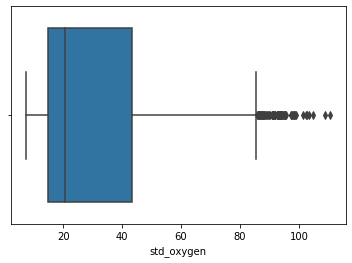

In [40]:
sns.boxplot(data.std_oxygen.dropna())


Z boxplotu vidíme, že v atribúte máme výrazných outlierov.

In [41]:
outliers_so = outliers("std_oxygen")
print("Počet outlierov v atribúte std_oxygen je %d"%len(outliers_so))

Počet outlierov v atribúte std_oxygen je 78


In [42]:
print("Počet chýbajúcich hodnôt v atribúte std_oxygen: %d"%data.std_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte std_oxygen: 14


Atribút **capital-gain**
- atribút vyjadrujúci nárast kapitálu
- nie je potrebný pre medicínske dáta
- čísený spojitý atribút

In [43]:
data['capital-gain'].describe()

count     3967.000000
mean      1042.988908
std       7006.726961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

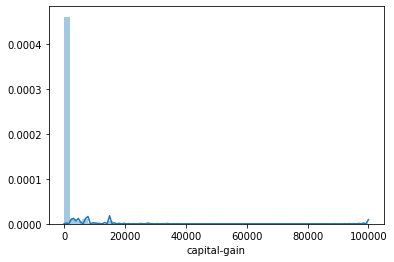

In [44]:
sns.distplot(data['capital-gain'].dropna())

Podľa grafu hustoty pravdepodobnostného rozdelenia vidíme, že väčšina prvkov sa rovná nule.
Pravdepodobne tento atribút nebude až tak dôležitý, v ďalšej fáze uvidíme čo s ním urobíme. 

In [45]:
print("Pomer počtu nulových záznamov atribútu voči iným hodnotám je " + str(len(data[data['capital-gain'] == 0])) + ":" + str(len(data[np.isfinite(data['capital-gain']) & data['capital-gain'] > 0])))
print("Počet chýbajúcich hodnôt v atribúte capital-gain: %d"%data['capital-gain'].isnull().sum())


Pomer počtu nulových záznamov atribútu voči iným hodnotám je 3633:334
Počet chýbajúcich hodnôt v atribúte capital-gain: 16


Atribút **skewness_oxygen**
- atribút vyjadruje koeficient asymetrie rozdelenia meraných hodnôt kyslíku v krvi pacienta
- spojitý číselný atribút, vykonávame deskriptívne štatistiky
- nie všetky hodnoty sú vyplnené


In [46]:
data.skewness_oxygen.describe()

count    3970.000000
mean       91.370712
std       108.475749
min        -1.976976
25%        12.858504
50%        68.623477
75%       127.236918
max      1191.000837
Name: skewness_oxygen, dtype: float64

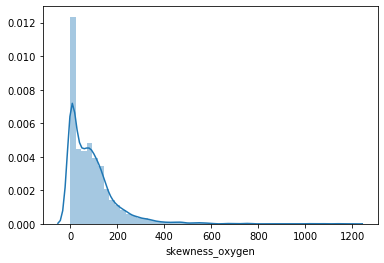

In [47]:
sns.distplot(data.skewness_oxygen.dropna())

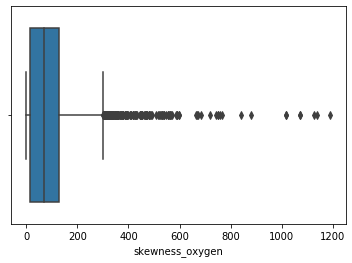

In [48]:
sns.boxplot(data.skewness_oxygen.dropna())

Z boxplot grafu je zrejmé že v dátach je veľký počet outlierov. 

In [49]:
outliers_so = outliers("skewness_oxygen")
print("Počet outlierov v atribúte skewness_oxygen je %d"%len(outliers_so))

Počet outlierov v atribúte skewness_oxygen je 162


In [50]:
print("Počet chýbajúcich hodnôt v atribúte skewness_oxygen: %d"%data.skewness_oxygen.isnull().sum())


Počet chýbajúcich hodnôt v atribúte skewness_oxygen: 13


Atribút **kurtosis_glucose**
 - je to spojitý číselný atribút nad ktorým môžme vykonávať deskriptívnu štatistiku
 - je to koeficient špicatosti distribúcie dát o hodnote glukózy v krvi daného pacienta
 - atribút je typu float
 - obsahuje chýbajúce hodnoty, vhodnou korekciou je nahradenie prázdnych hodnôt mediánom


In [51]:
data.kurtosis_glucose.describe()

count    3965.000000
mean        0.950507
std         1.611069
min        -1.641515
25%         0.072144
50%         0.310372
75%         0.775684
max         8.069522
Name: kurtosis_glucose, dtype: float64

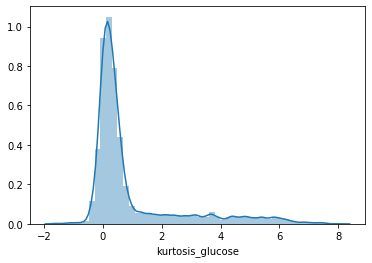

In [52]:
sns.distplot(data.kurtosis_glucose.dropna())

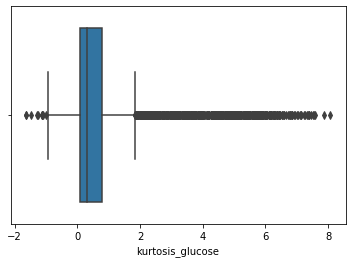

In [53]:
sns.boxplot(data.kurtosis_glucose.dropna())

Ako aj pri iných atribútoch, aj pri tomto je  v dátach veľký počet outlierov. 

In [54]:
outliers_kg = outliers("kurtosis_glucose")
print("Počet outlierov v atribúte kurtosis_glucose je %d"%len(outliers_kg))

Počet outlierov v atribúte kurtosis_glucose je 709


In [55]:
print("Počet chýbajúcich hodnôt v atribúte kurtosis_glucose: %d"%data.kurtosis_glucose.isnull().sum())

Počet chýbajúcich hodnôt v atribúte kurtosis_glucose: 18


Atribút **personal_info**
 - je to komplexný atribút typu string, v ktorom sa nachádza viacero hodnôt
 - bude treba v ďalšej časti tento atribút rozparsovať
 - na prvý pohľad v dátach existuje povolanie, štát, vzťah, dáta o práci a farba pleti
 - informácie o vzťahu by nám mohli pomôcť naplniť prázdne hodnoty v atribúte **relationship**
 - niektoré záznamy však taktiež obsahujú prázdne hodnoty

In [56]:
data.personal_info.head(5)

0    Prof-specialty|United-States\r\r\nMarried-civ-...
1    Prof-specialty|United-States\r\r\nNever-marrie...
2    Other-service|Mexico\r\r\nSeparated -- Private...
3    Prof-specialty|Canada\r\r\nNever-married -- Pr...
4    Sales|United-States\r\r\nMarried-civ-spouse --...
Name: personal_info, dtype: object

In [57]:
print("Počet chýbajúcich hodnôt v atribúte personal_info: %d"%data.personal_info.isnull().sum())

Počet chýbajúcich hodnôt v atribúte personal_info: 12


Atribút **education**
- kategorický atribút nadobúdajúci 16 rôznych hodnôt
- zrejme vyjadruje stupeň najvyššieho dosiahnutého vzdelania

In [58]:
len(data.education.dropna().unique())

16

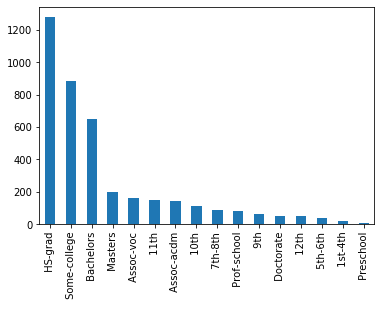

In [59]:
data.education.value_counts().plot.bar()

Ako môžme vidieť z grafu, v datasete máme najviac pacientov s najvyšším dosiahnutím "High School graduate"

In [60]:
print("Počet chýbajúcich hodnôt v atribúte education: %d"%data.education.isnull().sum())

Počet chýbajúcich hodnôt v atribúte education: 12


Atribút **fnlwgt**
- spojitý celočíselný atribút
- podľa hľadaní na internete vyjadruje atribút final weight určený organizáciou Census
- nie je relevatný s medicínskymi dátami

In [61]:
data.fnlwgt.describe()

count      3970.000000
mean     192967.197985
std      103285.567216
min       19214.000000
25%      120960.000000
50%      182045.000000
75%      241631.000000
max      889965.000000
Name: fnlwgt, dtype: float64

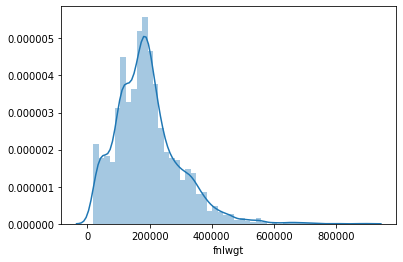

In [62]:
sns.distplot(data.fnlwgt.dropna())

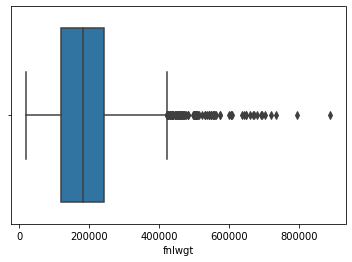

In [75]:
sns.boxplot(data.fnlwgt.dropna())

Z boxplotu vidíme, že atribút má veľa outlierov. Zistíme teda ktoré to sú a ich počet.

In [77]:
outliers_fnl = outliers("fnlwgt")
print("Počet outlierov v atribúte fnlwgt je %d"%len(outliers_fnl))

Počet outlierov v atribúte fnlwgt je 116


In [76]:
print("Počet chýbajúcich hodnôt v atribúte fnlwgt: %d"%data.fnlwgt.isnull().sum())

Počet chýbajúcich hodnôt v atribúte fnlwgt: 13


Atribút **class**
- ide o kategorický binárny atribút
- vyjadruje či je pacient chorý alebo zdravý
- nadobúda len dve hodnoty, 0 a 1
- nachádzajú sa tu aj prázdne hodnoty, korekcia: dopočítať na základe ostatných atribútov o hladine glukózy a kyslíku v krvi

In [81]:
data['class'].unique()

array([ 0.,  1., nan])

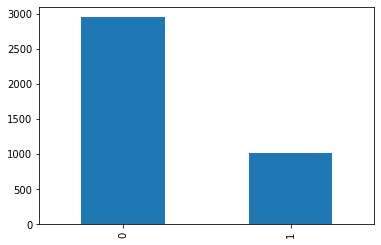

In [80]:
data['class'].dropna().astype(int).value_counts().plot.bar()

Atribút **std_glucose**
- ide o spojitý číselný atribút
- smerodajná odchýlka od normalneho rozdelenia hodnot nameranej glukózy v krvi
- obsahuje aj chýbajúce hodnoty

In [65]:
data.std_glucose.describe()

count    3971.000000
mean       74.479764
std      1448.165852
min     -8305.388133
25%        39.502222
50%        45.928079
75%        51.048246
max      6649.471314
Name: std_glucose, dtype: float64

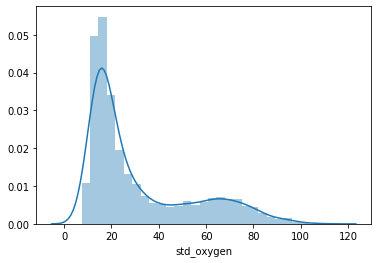

In [82]:
sns.distplot(data.std_oxygen.dropna())

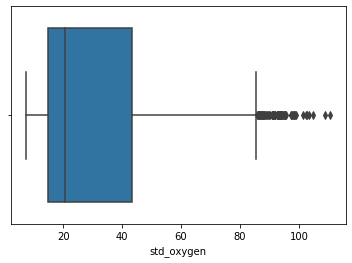

In [83]:
sns.boxplot(data.std_oxygen.dropna())

Opäť, podľa grafu je vidno že aj tento atribút má veľký počet outlierov.

In [84]:
outliers_so = outliers("std_oxygen")
print("Počet outlierov v atribúte std_oxygen je %d"%len(outliers_so))

Počet outlierov v atribúte std_oxygen je 78


In [86]:
print("Počet chýbajúcich hodnôt v atribúte std_oxygen: %d"%data.std_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte std_oxygen: 14


Atribút **income**
- ide o kategorický atribút
- vyjadruje zárobok pacienta (ročný)
- zobrazuje dve možné hodnoty, menej alebo rovné 50 tisíc (K) alebo viac
- niektoré záznamy obsahujú aj prázdne hodnoty
- korekcia: premeniť atribút na binárny

In [67]:
data.income.unique()

count       3969
unique         2
top        <=50K
freq        2988
Name: income, dtype: object

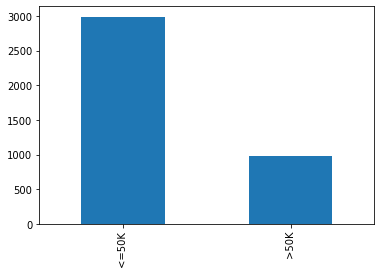

In [87]:
data.income.dropna().value_counts().plot.bar()

In [88]:
print("Počet chýbajúcich hodnôt v atribúte income: %d"%data.income.isnull().sum())

Počet chýbajúcich hodnôt v atribúte income: 14


Z grafu teda vidíme, že väčšina pacientov z nášho datasetu zarába pod 50 tisíc.

Atribút **mean_oxygen**
- číselný spojitý atribút, typu float, vykonáme deskriptívne štatistiky
- vyjadruje medián, strednú hodnotu v meraniach hodnoty kyslíku v krvi pacienta
- obsahuje aj prázdne hodnoty

In [69]:
data.mean_oxygen.describe()

count    3967.000000
mean       18.470601
std        34.808695
min         0.213211
25%         2.061873
50%         3.223244
75%        12.610786
max       217.371238
Name: mean_oxygen, dtype: float64

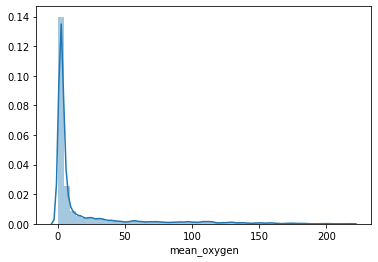

In [89]:
sns.distplot(data.mean_oxygen.dropna())



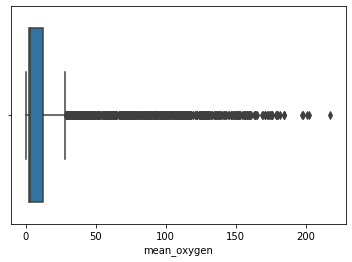

In [90]:
sns.boxplot(data.mean_oxygen.dropna())

Podľa grafu hustoty pravdepodobnostného rozdelenia vidíme, že äčšina prvkou je málo vyššia od nuly. Z boxplotu vidíme úzky pás medzikvartilového rozpätia a veľký počet outlierov.

In [91]:
outliers_mo = outliers("mean_oxygen")
print("Počet outlierov v atribúte mean_oxygen je %d"%len(outliers_mo))

Počet outlierov v atribúte mean_oxygen je 703


In [92]:
print("Počet chýbajúcich hodnôt v atribúte mean_oxygen: %d"%data.mean_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte mean_oxygen: 16


Atribút **hours-per-week**
- celočíselný spojitý atribút, typu float, vykonáme deskriptívne štatistiky
- vyjadruje počet odpracovaných hodín pacienta za týžde§
- obsahuje aj prázdne hodnoty

In [71]:
data['hours-per-week'].describe()


count    3970.000000
mean       40.568766
std        12.601133
min         1.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64

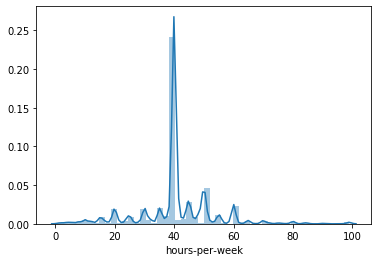

In [93]:
sns.distplot(data['hours-per-week'].dropna())

Vidíme, že väčšina pacientov sa nachádza okolo hodnoty 40 hodín týždenne.

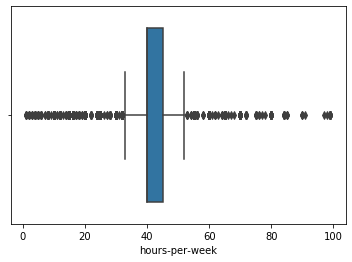

In [94]:
sns.boxplot(data['hours-per-week'].dropna())

Z boxplotu vidíme veľa outlierov na oboch koncoch medzikvartilového ropätia. Zistíme ktorí sú to a taktiež aj ich počet.


In [95]:
outliers_hpw = outliers("hours-per-week")
print("Počet outlierov v atribúte hours-per-week je %d"%len(outliers_hpw))

Počet outlierov v atribúte hours-per-week je 1098


In [96]:
print("Počet chýbajúcich hodnôt v atribúte mean_oxygen: %d"%data.mean_oxygen.isnull().sum())

Počet chýbajúcich hodnôt v atribúte mean_oxygen: 16


Atribút **capital-loss**
- atribút vyjadrujúci pokles kapitálu
- čísený spojitý atribút, urobíme deskriptívnu štatistiku

In [73]:
data['capital-loss'].describe()

count    3963.000000
mean       80.275549
std       388.336046
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3770.000000
Name: capital-loss, dtype: float64

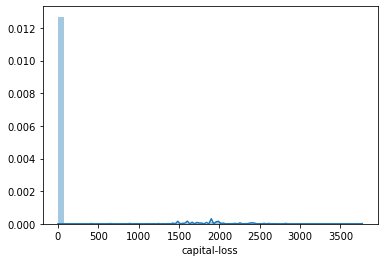

In [97]:
sns.distplot(data['capital-loss'].dropna())


Opäť ako aj pri atribúte capital_loss podľa grafu hustoty pravdepodobnostného rozdelenia vidíme, že väčšina prvkov sa rovná nule. 
Pravdepodobne tento atribút nemá pacientmi vyplnený.

In [99]:
print("Pomer počtu nulových záznamov atribútu voči iným hodnotám je " + str(len(data[data['capital-loss'] == 0])) + ":" + str(len(data[np.isfinite(data['capital-loss']) & data['capital-loss'] > 0])))
print("Počet chýbajúcich hodnôt v atribúte capital-gain: %d"%data['capital-loss'].isnull().sum())

Pomer počtu nulových záznamov atribútu voči iným hodnotám je 3793:170
Počet chýbajúcich hodnôt v atribúte capital-gain: 20


## Riešenie chybných a problematických údajov